In [1]:
%matplotlib inline

import requests
import pandas as pd

import pylab
from jupyterthemes import jtplot

import matplotlib.pylab as plt
import numpy as np

from dateutil import parser

In [2]:
url_current_price = 'https://api.coindesk.com/v1/bpi/currentprice.json'
data_cp = requests.get(url_current_price).json()
cp = float(data_cp['bpi']['USD']['rate'].replace(',',''))
ct = parser.parse(data_cp['time']['updated'])

In [3]:
url = "https://api.blockchain.info/charts/market-price?timespan=all"
data = requests.get(url).json()
df = pd.DataFrame(data["values"])

In [4]:
df = df.append({'x':ct.timestamp(), 'y':cp}, ignore_index=True)

/home/g/.local/share/virtualenvs/sqlal_pandas-SjD_7LSn/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if __name__ == '__main__':
/home/g/.local/share/virtualenvs/sqlal_pandas-SjD_7LSn/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Date
2019-09-14 00:00:00    10338.066667
2019-09-17 00:00:00    10217.202500
2019-09-20 00:00:00    10178.476667
2019-09-23 00:00:00     9879.955833
2019-09-25 12:05:00     8323.000000
Name: USD/BTC, dtype: float64

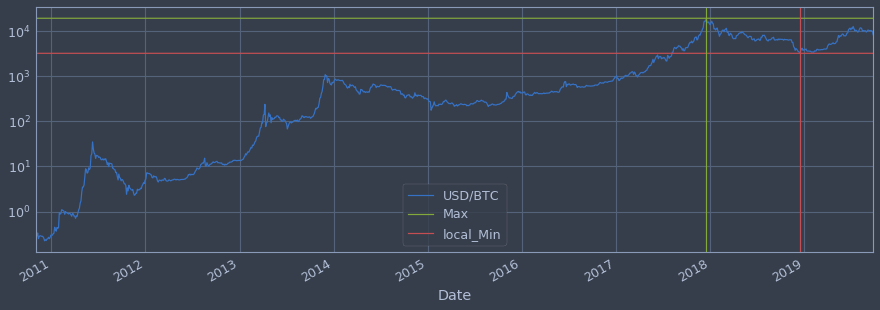

In [5]:
df.columns = ['Date','USD/BTC']
df["Date"] = pd.to_datetime(df["Date"], unit='s')
df=df.set_index("Date")

jtplot.style(theme='onedork')
pylab.rcParams['figure.figsize'] = (15, 5)

df['Max'] = df['USD/BTC'].max()
mi = df['USD/BTC'].argmax()
df['local_Min'] = df['USD/BTC'][mi:].min()
df["2010-11":].plot(logy=True)

plt.annotate(df['USD/BTC'][mi],xy=("2010-11",df["USD/BTC"][mi]),color='g')
plt.axvline(mi,color='g')


lmi=df['USD/BTC'][mi:].argmin()
plt.annotate(df['USD/BTC'][lmi],xy=("2010-11",df["USD/BTC"][lmi]),color='r')
plt.axvline(lmi,color='r')

df['USD/BTC'].tail()

In [6]:
pylab.rcParams['figure.figsize'] = (15, 5)

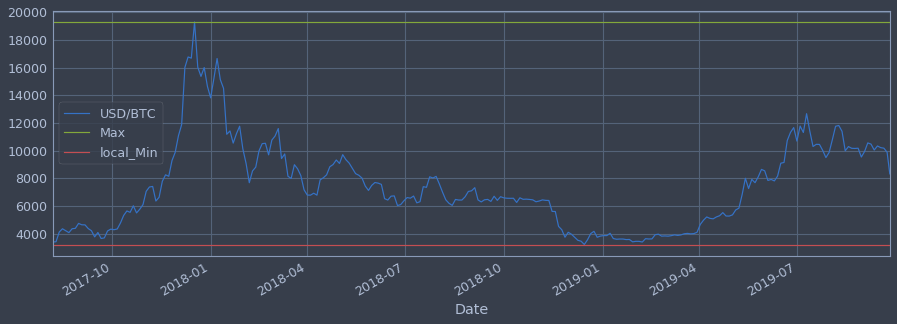

In [7]:
start = df['USD/BTC'][df['USD/BTC']>df['local_Min']].index[0]
df[start:].plot()